# Jupyter Notebook UI to graph your TAP data!

Version 1.7 - Joseph Liang, Rankin Lab
Updated:
1. Upgraded folder path selection application
2. Upgraded dataset management (less moving parts for end-user)
3. output changed from tif -> png
4. Added tap-correction function for missing taps (should be working now)
5. Added plate column to evaluate plate-discrepancies
6. Added separate graphing function for plate-discrepancies
7. Added colour palette-setting function
8. Added automatic strain identifier function
9. Replaced tkinter (which has a variety of bugs) with ipyfilechooser widget for compatibility with Notebooks

## Known bug: Step 2 an empty windows displays in Mac. May also apply to linux/windows.

## Beginner Essentials:
1. Shift-Enter to run each cell. After you run, you should see an output "done step #". If not, an error has occured
2. When inputting your own code/revising the code, make sure you close all your quotation marks '' and brackets (), [], {}.
3. Don't leave any commas (,) hanging! (make sure an object always follows a comma. If there is nothing after a comma, remove the comma!
4. Learning to code? Each line of code is annotated to help you understand how this code works!

## 3. Run all cells/steps sequentially, even the ones that do not need input

## Steps that require input: #3, #6.1, #7

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import math
import os #<- package used to work with system file paths
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- another package used to plot graphs
from itertools import cycle #<- package used to iterate down rows (used in step 5 to add tap column)
import ipywidgets as widgets #<- widget tool to generate button and tab for graphs
from IPython.display import display #<- displays widgets
from ipyfilechooser import FileChooser
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button from output)

Run the following cell and click the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [2]:
starting_directory = '/Users/Joseph'
chooser = FileChooser(starting_directory)
display(chooser)

FileChooser(path='/Users/Joseph', filename='', title='', show_hidden=False, select_desc='Select', change_desc=…

In [3]:
print(chooser.selected_path)
folder_path=chooser.selected_path

/Users/Joseph/Desktop/PD_Uncertain_Loci_TapHab_Screen_Apr09_2025


In [ ]:
# Obsolete
# ### Select Folder App - After you run, you can select your folder for filepath
# button = widgets.Button(description = 'Select Folder') #<- Creates a button variable
# display(button) #<- displays this button on output
# def select_folder(b): #<- This is an action. Requires a variable, so I put in an arbitrary one 'b'
#     global folder_path #<- sets a variable as a global variable, not just within this action
#     Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
#     folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
#     Tk().update()#<- below
#     Tk().destroy()#<- this and the line above it removes the file explorer window after a selection is made
#     print(folder_path) #<- this helps confirm that this action was performed
#     print('done step 2')
# button.on_click(select_folder) #<- describes what happens when you click on this button

# 3. User Defined Variables (Add input here)

Here, we add some constants to help you blaze through this code.

3.1: Number of taps is pretty self-explanatory. How any taps does your experiment have? put in that number + 1 (N+1)!

This may be a bit confusing, but this is due to some coding syntax that you don't have to worry about.

3.2: Change your ISI number. This will be reflected in the name/title of the output figure.

In [4]:

number_of_taps = 30 ###<------ Taps in your experiment.

number_taps = range(1, number_of_taps + 1)  #<- do not change this


# if you have different ISIs in the same folder, then come back and change this 
# when you are graphing for the second set of data with the other ISI 
# (Generally data from same ISIs are graphed together)
# If changing ISI mid-analysis, you can just skip straight to step 8 after running this cell again

ISI = 10  ### <- What is your ISI? change accordingly
first_tap = 600 ### <- when is your first tap? check your TRV files

#Here, open up one of the trv files to determine the times for each of these taps. 
lower = np.arange(first_tap-1, first_tap-1+(number_of_taps*ISI), ISI) #(first tap, last tap+10s, ISI)
upper = np.arange(first_tap+1, first_tap+1+(number_of_taps*ISI), ISI) #(first tap, last tap+10s, ISI)
tolerances = list(zip(lower, upper)) 
taps = [i for i in range(1,number_of_taps+1)]

#### Add 31st Tap Here --------------------------------------------------<------------
tolerances.append((1188,1191))
taps.append(31)


#assign each tolerance to a tap number
accurate_taps = list((zip(taps, tolerances)))
print(accurate_taps)

for pair in accurate_taps:
   tap = pair[0]
   tolerance = pair[1]
   print("tap "+str(tap), "tolerance="+str(tolerance))

print("done step 3")

[(1, (599, 601)), (2, (609, 611)), (3, (619, 621)), (4, (629, 631)), (5, (639, 641)), (6, (649, 651)), (7, (659, 661)), (8, (669, 671)), (9, (679, 681)), (10, (689, 691)), (11, (699, 701)), (12, (709, 711)), (13, (719, 721)), (14, (729, 731)), (15, (739, 741)), (16, (749, 751)), (17, (759, 761)), (18, (769, 771)), (19, (779, 781)), (20, (789, 791)), (21, (799, 801)), (22, (809, 811)), (23, (819, 821)), (24, (829, 831)), (25, (839, 841)), (26, (849, 851)), (27, (859, 861)), (28, (869, 871)), (29, (879, 881)), (30, (889, 891)), (31, (1188, 1191))]
tap 1 tolerance=(599, 601)
tap 2 tolerance=(609, 611)
tap 3 tolerance=(619, 621)
tap 4 tolerance=(629, 631)
tap 5 tolerance=(639, 641)
tap 6 tolerance=(649, 651)
tap 7 tolerance=(659, 661)
tap 8 tolerance=(669, 671)
tap 9 tolerance=(679, 681)
tap 10 tolerance=(689, 691)
tap 11 tolerance=(699, 701)
tap 12 tolerance=(709, 711)
tap 13 tolerance=(719, 721)
tap 14 tolerance=(729, 731)
tap 15 tolerance=(739, 741)
tap 16 tolerance=(749, 751)
tap 17 to

# 4. Constructing Filelist From Source File/Select File (Just run)

In [5]:
#folder_path = '/Users/Joseph/Desktop/AVR14_10sISI' #- manual folder path if Tkinter is acting up

os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.trv'): #<- and takes out all files with a .trv (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print(filelist)
print('done step 4')

['/Users/Joseph/Desktop/PD_Uncertain_Loci_TapHab_Screen_Apr09_2025/N2/20250409_113506/N2_6x2_f72h20C_600s31x10s10s_B0409ac.trv', '/Users/Joseph/Desktop/PD_Uncertain_Loci_TapHab_Screen_Apr09_2025/N2/20250409_120346/N2_6X2_f96h20C_600s31x10s10s_C0409ae.trv', '/Users/Joseph/Desktop/PD_Uncertain_Loci_TapHab_Screen_Apr09_2025/N2/20250409_043625/N2_6x2_f96h20C_600s31x10s10s_A0409ad.trv', '/Users/Joseph/Desktop/PD_Uncertain_Loci_TapHab_Screen_Apr09_2025/N2/20250409_111339/N2_6X2_f96h20C_600s31x10s10s_C0409ab.trv', '/Users/Joseph/Desktop/PD_Uncertain_Loci_TapHab_Screen_Apr09_2025/N2/20250409_034619/N2_6x2_f96h20C_600s31x10s10s_A0409aa.trv', '/Users/Joseph/Desktop/PD_Uncertain_Loci_TapHab_Screen_Apr09_2025/clec-52_tm8126/20250409_041057/FX08125_10x2_f96h20C_600s31x10s10s_A0409bb.trv', '/Users/Joseph/Desktop/PD_Uncertain_Loci_TapHab_Screen_Apr09_2025/clec-52_tm8126/20250409_120033/FX08125_10x2_f72h20C_600s31x10s10s_B0409bd.trv', '/Users/Joseph/Desktop/PD_Uncertain_Loci_TapHab_Screen_Apr09_2025/c

In [6]:
# print(filelist)
print(len(filelist))

9


In [10]:
genotype=[]
for f in filelist:
    genotype.append(f.split('/')[-3])
# print(np.unique(genotype))
genotypes=np.unique(genotype)
print(genotypes)
print(len(np.unique(genotypes)))
strainNs = enumerate(genotypes,1)
strain_enum=list(strainNs)
print(strain_enum)
StrainNames=dict(strain_enum)
print(StrainNames)

['N2' 'clec-52_tm8126']
2
[(1, 'N2'), (2, 'clec-52_tm8126')]
{1: 'N2', 2: 'clec-52_tm8126'}


In [15]:
string='/Users/Joseph/Desktop/PD_Uncertain_Loci_TapHab_Screen_Apr09_2025/N2/20250409_113506/N2_6x2_f72h20C_600s31x10s10s_B0409ac.trv'
print(string.split('/')[-1].split('_')[-1].split('.')[0])
print(string.split('/')[-2].split('_')[0])
print(string.split('/')[-1].split('_')[4].split('.')[0][1:5])

B0409ac
20250409
0409


In [18]:
# Adjust below code for plate_id functionality

plate_id=[]
for f in filelist:
    plate_id.append(f.split('/')[-1].split('_')[-1])
    # plate_id.append(f.split('/')[6].split('_')[4].split('.')[0])
    # plate_id.append(f.split('/')[7].split('.')[0].split('_')[-1])
print(plate_id)
                    
print("done")

['B0409ac.trv', 'C0409ae.trv', 'A0409ad.trv', 'C0409ab.trv', 'A0409aa.trv', 'A0409bb.trv', 'B0409bd.trv', 'C0409bc.trv', 'B0409ba.trv']
done


# 5. Process Data Function (Just Run)

In [19]:
def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = [x for x in filelist if strain in x] #<- goes through the list and filters for keyword
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    Plate_N = 1
    print(f'this strain/treatment has {Strain_N} plates') #<- will output as the first number
    if Strain_N == 0:
        raise AssertionError ('{} is not a good identifier'.format(strain))
    else:
        pass
#     for f in strain_filelist:
#         DF_Total = pd.concat(pd.read_csv(f, sep=' ', skiprows = 4, header = None))
        strain_filelist = [file for file in filelist if strain in file]
        df_list=[]
        for file in strain_filelist:
            df= pd.read_csv(file, sep=' ', header = None)
            df['plate_id'] = file.split('/')[-1].split('_')[-1].split('.')[0]
            df['date'] = file.split('/')[-2].split('_')[0]
            df_list.append(df)
        DF_Total = pd.concat(df_list, ignore_index = True)
        
#         DF_Total = pd.concat([pd.read_csv(f, sep=' ', header = None, encoding_errors='ignore') for f in strain_filelist],
#                       ignore_index=True) #<- imports your data files
#         DF_Total = DF_Total.dropna(axis = 1) #<- cleans your data
        DF_Total = DF_Total.rename( #<- more cleaning
                    {0:'time',
                    2:'rev_before',
                    3:'no_rev',
                    4:'stim_rev',
                    7:'dist',
                    8:'dist_std',
                    9:'dist_stderr',
                    11:'dist_0th',
                    12:'dist_1st',
                    13:'dist_2nd',
                    14:'dist_3rd',
                    15:'dist_100th',
                    18:'dura',
                    19:'dura_std',
                    20:'dura_stderr',
                    22:'dura_0th',
                    23:'dura_1st',
                    24:'dura_2nd',
                    25:'dura_3rd',
                    26:'dura_100th'}, axis=1)
        #check function here for NaN Columns
        DF_Total['plate'] = 0
        DF_Total['prob'] = DF_Total['stim_rev']/ (DF_Total['no_rev'] + DF_Total['stim_rev']) #<- calculate prob
        DF_Total['speed'] = DF_Total['dist']/DF_Total['dura'] #<- calculate speed
        DF_Total_rows = int(DF_Total.shape[0])
        print(f'this strain/treatment has {DF_Total_rows} total taps') #<- Outputs as the second number. Check if you are missing taps!
        DF_Final = DF_Total[["time", "dura", "dist", "prob", "speed", "plate", "plate_id", "date"]].copy()

    return{
            'N': Strain_N,
            'Confirm':DF_Total,
            'Final': DF_Final}
    print('done!')



def assign_taps(DF, tolerances):
    DF['taps'] = ""
    for taps, tolerance in enumerate(tolerances): #[(99, 101), (109,111), ...]
        tap_lower,tap_upper = tolerance
        TimesInTapRange = DF['time'].between(tap_lower,tap_upper, inclusive="both")
        DF.loc[TimesInTapRange,'taps'] = taps+1 #set the tap to i where times are between



    
def insert_plates(df):   
    """This function inserts a plate column into a dataframe.
    
    :param df: any dataframe
    :type: pandas.core.frame.DataFrame
    
    :return: dataframe with a plate column
    :type: pandas.core.frame.DataFrame
    """
    df['plate']=(df['taps'] ==1).cumsum()


            
print('done step 5')

done step 5


# 6.1 Process Data (PLEASE READ, Add input here)

Here is the hardest part - From your naming convention, you need to pick a unique identifier for each group.

This means that all of names of your files for that strain should have that in common but is not commone with across all other files! If you did a good job naming your files and following a good naming convention, this should be easy.

## Be careful and really look hard in your naming structure. Note you want an unique identifier in the entire file path for the same group of files. An easy mistake is to have the strain name in the overall folder name, in this case if you use your strain name as a keyword it would include all files in that folder!

For example, if all your N2 files have a certain pattern like "N2_5x4" in this following example:
'/Users/Joseph/Desktop/AVR14_10sISI_TapHab_0710_2019/N2/20190710_141740/N2_5x4_f94h20c_100s30x10s10s_C0710ab.trv'

Then you need to set that identifier for the strain keyword:
'Strain_1' = 'N2_5x4'

## Depending on how many strains you are running for comparison, you may need to add/delete some lines!

## You are not naming your data groups here, we have a step for that later!
## Here, you want to note down ALL the strains you have in the folder

If you have just 2 strains, add hashtags (#) in front of the lines you do not need.
If you need more strains, just add more lines, following the same format!

In [ ]:
# #Format: 'Strain_#'' = 'unique_identifier'

# ### Make into dictionary
# StrainNames = {
#     'Strain_1' : 'N2',  #<- each strain will be designated to a unique identifier here
#     'Strain_2' : 'cat-2_e1112',
#     'Strain_3' : 'cat-2_n4547',
#     'Strain_4' : 'cat-2_tm2261',
#     'Strain_5' : 'dat-1_ok157',
#     'Strain_6' : 'cat-1_ok411',
#     'Strain_7' : 'pdr-1_gk448', #<- empty entries are for those hardcore trackers that tracks this many strains
#     'Strain_8' : 'pdr-1_tm395',
#     'Strain_9' : 'pdr-1_tm598',
#     'Strain_10' : 'dop-1_vs101',
#     'Strain_11' : 'dop-3_ok295',
#     'Strain_12' : 'snb-5_ok1434',
#     'Strain_13' : 'unc-10_ad591',
# #     'Strain_14' : '',
# #     'Strain_15' : '',
# }
# #...etc, etc

# print('done step 6.1')

In [20]:
print(list(StrainNames.values()))
print(type(list(StrainNames.values())))
print(type(list(StrainNames.values())[0]))

['N2', 'clec-52_tm8126']
<class 'list'>
<class 'numpy.str_'>


# 6.2 Process Data (just run this cell)

In [21]:
DataLists = [0]  #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in list(StrainNames.values()): #<- goes through the dictionary in step 6.1 and processes data
    if not s == '':
#         threading.Thread(target=DataLists.append(ProcessData(s)['Final'])).start()
        DataLists.append(ProcessData(s)['Final']) #<- appends all data into a list of dataframes


for df in DataLists[1:]: 
    assign_taps(df, tolerances)
for df in DataLists[1:]:    
    insert_plates(df)

# print(x)
# print(DataLists[0])
# print(DataLists[1])
#print(DataLists[2])
#print(len(DataLists))        
print('done step 6.2')

this strain/treatment has 5 plates
this strain/treatment has 154 total taps
this strain/treatment has 4 plates
this strain/treatment has 124 total taps
done step 6.2


# 7. Grouping Data and Naming (Optional: Add input here)

Here, you get to name your data groups/strain! Name your groups however you like under between the quotation marks for each strain.

For example: If your Strain1 is N2 and you wish for the group to be called N2,
your line should look like:

DataLists[x].assign(dataset = 'N2')

## Go back to step 6.1 to check which strain is which item on the DataLists.
In this example, the first item on DataLists is N2.


## Remember: Put your name in quotes. (ex: 'N2' and not N2)

As default, the names are set to the unique identifier labels.

## Depending on the number of strains you are running the comparison, you may have to delete/add lines of code (following the same format). 
## Remember to add/delete commas too.

# If you want to change your groups, you do that here. 
For example, if you have 5 strains in your folder but only want to compare between 2 or 3 strains, designate that here and follow through with steps 6 and 7. Once you are done, come back to step 6 and change your groups again (You are going to have to change your graph titles for the second run-through though)!

In [22]:
TotalConcatenated=pd.DataFrame()
for d in range(1,len(np.unique(genotypes))+1):
    print(d)
    TotalConcatenated=pd.concat([TotalConcatenated,
                                 DataLists[d].assign(dataset=StrainNames.get(d))])



# TotalConcatenated = pd.concat([ #<- this function joins your data together with an extra column for which group 
#                           DataLists[1].assign(dataset = "Wildtype (N2)"), 
#                           DataLists[2].assign(dataset = "cat-2 (e1112)"),
#                           DataLists[3].assign(dataset = "cat-2 (n4547)"),
#                           DataLists[4].assign(dataset = "cat-2 (tm2261)"),
#                           DataLists[5].assign(dataset = "dat-1 (ok157)"),
#                           DataLists[6].assign(dataset = "cat-1 (ok441)"),
#                           DataLists[7].assign(dataset = "pdr-1 (gk448)"),
#                           DataLists[8].assign(dataset = "pdr-1 (tm395)"),
#                           DataLists[9].assign(dataset = "pdr-1 (tm598)"),
#                           DataLists[10].assign(dataset = "dop-1 (vs101)"),
#                           DataLists[11].assign(dataset = "dop-3 (ok295)"),
#                           DataLists[12].assign(dataset = "snb-5 (ok1434)"),
#                           DataLists[13].assign(dataset = "unc-10 (ad591)"),
# #                           DataLists[14].assign(dataset = "GOA1 Mutant (n3055)"),
# #                           DataLists[5].assign(dataset = StrainNames.get("Strain_5")),
# #                         DataLists[5].assign(dataset = "StrainNameOnePoster"), #<----- example of custom name
                          
# ])
# # ...etc etc

TotalConcatenated.reset_index(inplace=False)
print(TotalConcatenated)

#if TotalConcatenated["taps"].loc[ind] is not 1:
#   TotalConcatenated["taps"].loc[ind:indices[c+1]] = list(range(1,len(TotalConcatenated["taps"].loc[ind:indices[c+1]])+1))
# missing_taps(TotalConcatenated, accurate_taps, tolerances)

print('done step 7')

1
2
         time  dura   dist      prob     speed  plate plate_id      date taps  \
0     599.993  2.85  0.679  0.947368  0.238246      1  B0409ac  20250409    1   
1     609.992  2.44  0.606  0.805556  0.248361      1  B0409ac  20250409    2   
2     619.990  2.72  0.724  0.702703  0.266176      1  B0409ac  20250409    3   
3     629.994  2.05  0.489  0.657895  0.238537      1  B0409ac  20250409    4   
4     639.955  1.87  0.428  0.609756  0.228877      1  B0409ac  20250409    5   
..        ...   ...    ...       ...       ...    ...      ...       ...  ...   
119   859.998  1.62  0.303  0.666667  0.187037      4  B0409ba  20250409   27   
120   869.961  2.57  0.509  0.666667  0.198054      4  B0409ba  20250409   28   
121   879.965  2.83  0.434  1.000000  0.153357      4  B0409ba  20250409   29   
122   889.946  1.10  0.210  1.000000  0.190909      4  B0409ba  20250409   30   
123  1189.959  1.27  0.166  0.750000  0.130709      4  B0409ba  20250409   31   

            dataset  
0

In [27]:
print(TotalConcatenated)
N2data=TotalConcatenated[TotalConcatenated.dataset=='N2']
print(N2data)

         time  dura   dist      prob     speed  plate plate_id      date  \
0     599.959  3.21  0.581  0.803922  0.180997      0  B0407ba  20230407   
1     609.960  2.54  0.509  0.648148  0.200394      0  B0407ba  20230407   
2     619.914  1.84  0.409  0.750000  0.222283      0  B0407ba  20230407   
3     629.897  1.73  0.364  0.474576  0.210405      0  B0407ba  20230407   
4     639.989  1.21  0.247  0.536232  0.204132      0  B0407ba  20230407   
..        ...   ...    ...       ...       ...    ...      ...       ...   
149   859.999  5.11  1.145  0.046512  0.224070      0  A0506be  20220510   
150   869.974  1.18  0.236  0.068182  0.200000      0  A0506be  20220510   
151   879.970  2.54  0.840  0.113636  0.330709      0  A0506be  20220510   
152   889.987  0.90  0.181  0.133333  0.201111      0  A0506be  20220510   
153  1189.963  2.38  0.663  0.625000  0.278571      0  A0506be  20220510   

            dataset  
0    F32D8.13_gk584  
1    F32D8.13_gk584  
2    F32D8.13_gk584  

In [38]:
# TotalByDate=N2data.drop(['plate_id','dataset'], axis=1).groupby(['taps','date'], as_index=False).mean()
TotalByDate=TotalConcatenated.drop(['plate_id','dataset'], axis=1).groupby(['taps','date'], as_index=False).mean()
print(TotalByDate)

     taps      date        time    dura     dist      prob     speed  plate
0       1  20220510   599.97460  2.2560  0.56620  0.609048  0.480907    3.0
1       1  20220511   599.96460  2.5560  0.52840  0.916057  0.208252    8.0
2       1  20220513   599.96940  2.3900  0.55220  0.787177  0.233872   13.0
3       1  20220524   599.96770  2.5440  0.66240  0.862771  0.263577   20.5
4       1  20220627   599.95340  2.7800  0.52740  0.848760  0.189861   28.0
...   ...       ...         ...     ...      ...       ...       ...    ...
1080   31  20230307  1189.96700  2.9820  0.68060  0.721271  0.224023  145.0
1081   31  20230324  1189.95200  2.6725  0.63475  0.728563  0.233296  164.5
1082   31  20230328  1189.93600  2.8020  0.57020  0.657163  0.201345  162.0
1083   31  20230331  1189.94675  1.8650  0.33200  0.619236  0.179072  157.5
1084   31  20230407  1189.98000  2.3575  0.52550  0.809232  0.221691  154.0

[1085 rows x 8 columns]


# Setting Colour Palette - Only run the below cell ONCE

The following code sets the colour palette for the whole experiment - and then designate one colour to each strain. After this, if as you are graphing you take away some strains, you can do so with the colours still matching accordingly.

In [28]:
# If you want the default colour palette #
strains = TotalConcatenated['dataset'].unique()
pal = dict(zip(strains, sns.color_palette("deep", n_colors=len(strains))))
print('palette is:' + str(pal))


# pal = {'Wildtype (N2)': 'black', 
#        'cat-2 (e1112)': 'lavender', 
#        'cat-2 (n4547)': 'cornflowerblue', 
#        'cat-2 (tm2261)': 'blue', 
#        'dat-1 (ok157)': 'blueviolet', 
#        'cat-1 (ok441)': 'magenta', 
#        'pdr-1 (gk448)': 'rosybrown', 
#        'pdr-1 (tm395)': 'lightcoral', 
#        'pdr-1 (tm598)': 'indianred', 
#        'dop-1 (vs101)': 'slategray', 
#        'dop-3 (ok295)': 'darkslategray', 
#        'snb-5 (ok1434)': 'mediumseagreen', 
#        'unc-10 (ad591)': 'darkorange'}

print('palette is:' + str(pal))
# IF YOU WANT TO CUSTOMIZE THE COLOR PALETTE OF THE GRAPHS
# pal = {"N2": (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
#        "LX2060": (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
#     }

print('done setting colour palette')

palette is:{'N2': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 'clec-52_tm8126': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)}
palette is:{'N2': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 'clec-52_tm8126': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)}
done setting colour palette


In [ ]:
# Outputs final data onto a spreadsheet
TotalConcatenated.to_csv("tap_output.csv")
print('done')


# 7.5: BONUS - Graph by plates to check for anomolies across each strain/treatment

Here, we will be graphing each strain on their own by their individual plates - this will help us find any anomolies or outliers that we can then exclude!


In [ ]:
Strain_pal = sns.choose_colorbrewer_palette('sequential')


In [ ]:
StrainNames.get("Strain_1")

In [ ]:
StrainConcatenated = TotalConcatenated[TotalConcatenated.dataset==StrainNames.get("Strain_1")] #Change/dictate which strain you are analyzing
print(StrainConcatenated)

In [ ]:
StrainConcatenated = TotalConcatenated[
    TotalConcatenated.dataset == 'unc-10 (ad591)'] #Change/dictate which strain you are analyzing
StrainName = "unc-10 (ad591)" #Also change this, for labeling purposes


out1 = widgets.Output() #<- this is part of the code that helps display your graphs in tabs
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3, out4]) #<- more code to support tab display
tab.set_title(0, 'Probability')
tab.set_title(1, 'Distance')
tab.set_title(2, 'Duration')
tab.set_title(3, 'Speed')
display(tab)

plt.rcParams.update({'lines.markeredgewidth': 1})

# Probability
with out1:
    plt.figure(linewidth = 2.5) #<- Make your figure lines THICCCC for clean display (posters)
    plt.figure(figsize=(12,10)) #<- set your figure size (width, length)
    plt.gca().xaxis.grid(False) #<- gets rid of x-axis markers to make data look clean 
    ax = sns.pointplot(x="taps", #<- Here we use seaborn as our graphing package. 
                     y="prob",  
                     data = StrainConcatenated,
                     hue = 'plate_id', #<- Here we use the extra column from step 6 to separate by group
                     palette = Strain_pal, #<- Change colour palette here if you like
                     ci = 95) #<- Confidence interval. 95 = standard error
    plt.xlabel("Taps") #<- X-axis title
    plt.ylabel("Probability") #<- Y-Axis title
    plt.title(f"{StrainName} Probability of Tap Habituation, {ISI}ISI") #<- Figure Title
    plt.ylim(0,1)
    ax.legend(loc = 'upper right', fontsize = '12') #<- location of your legend
    plt.savefig(f'{StrainName}_Probability_{ISI}ISI_ByPlate.png', format='png', dpi=450) #<- saves your file to your folder at certain DPI
    plt.show()

# Distance
with out2:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                     y="dist", 
                     data = StrainConcatenated,
                     hue = 'plate_id',
                     palette = Strain_pal,
                     ci = 95)
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Distance", fontsize = '12')
    plt.title(f"{StrainName} Distance of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,1.5)
    ax.legend(loc = 'upper right', fontsize = '12')
    plt.savefig(f'{StrainName}_Distance_{ISI}ISI_ByPlate.png', format='png', dpi=450)
    plt.show()

# Duration
with out3:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                     y="dura", 
                     data = StrainConcatenated,
                     hue = 'plate_id',
                     palette = Strain_pal,
                     ci = 95)
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Duration", fontsize = '12')
    plt.title(f"{StrainName} Duration of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,3)
    ax.legend(loc = 'upper right', fontsize = '12')
    plt.savefig(f'{StrainName}_Duration_{ISI}ISI_ByPlate.png', format='png', dpi=450)
    plt.show()

# Speed
with out4:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                     y="speed", 
                     data = StrainConcatenated,
                     hue = 'plate_id',
                     palette = Strain_pal,
                     ci = 95)
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Speed", fontsize = '12')
    plt.title(f"{StrainName} Speed of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,0.5)
    ax.legend(loc = 'upper right', fontsize = '12')
    plt.savefig(f'{StrainName}_Speed_{ISI}ISI.png_ByPlate', format='png', dpi=450)
    plt.show()

# 8. Graph Data (Probability, Distance, Duration, Speed of Tap Habituation)

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data!

Note: It has been agreed by the lab that distance is quite an outdated measure, and the three top measures we consider are:

## probability, duration and speed.

In [ ]:
# PD_tap=pd.read_csv('/Users/Joseph/Desktop/NewData/hab_output.csv').iloc[: , 1:]
# N2=PD_tap[PD_tap.dataset=='N2']
# mutant=PD_tap[PD_tap.Allele=='js125']
# data=pd.concat([N2,mutant], ignore_index=True, sort=False)
# data['Time']=data.time.round(-1)
# # print(N2)
# # print(mutant)
# print(data)
# data.to_csv('/Users/Joseph/Desktop/NewData/unc_output.csv')

<Figure size 640x480 with 0 Axes>

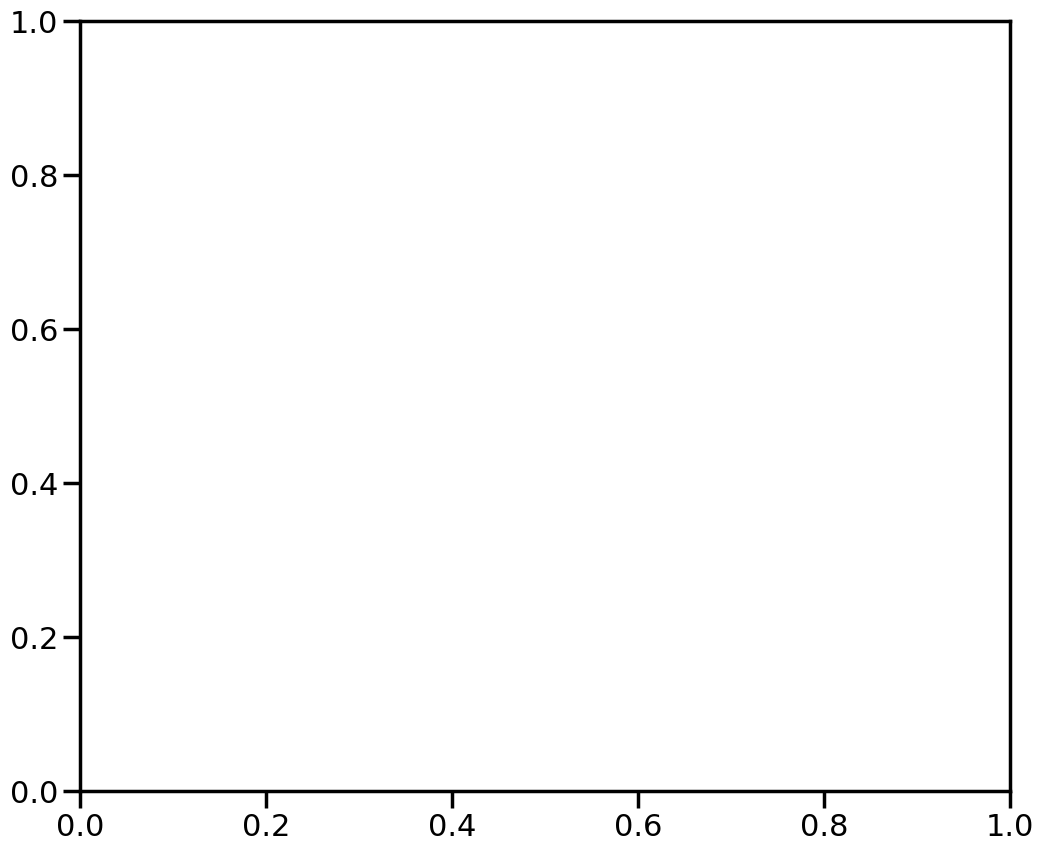

<Figure size 640x480 with 0 Axes>

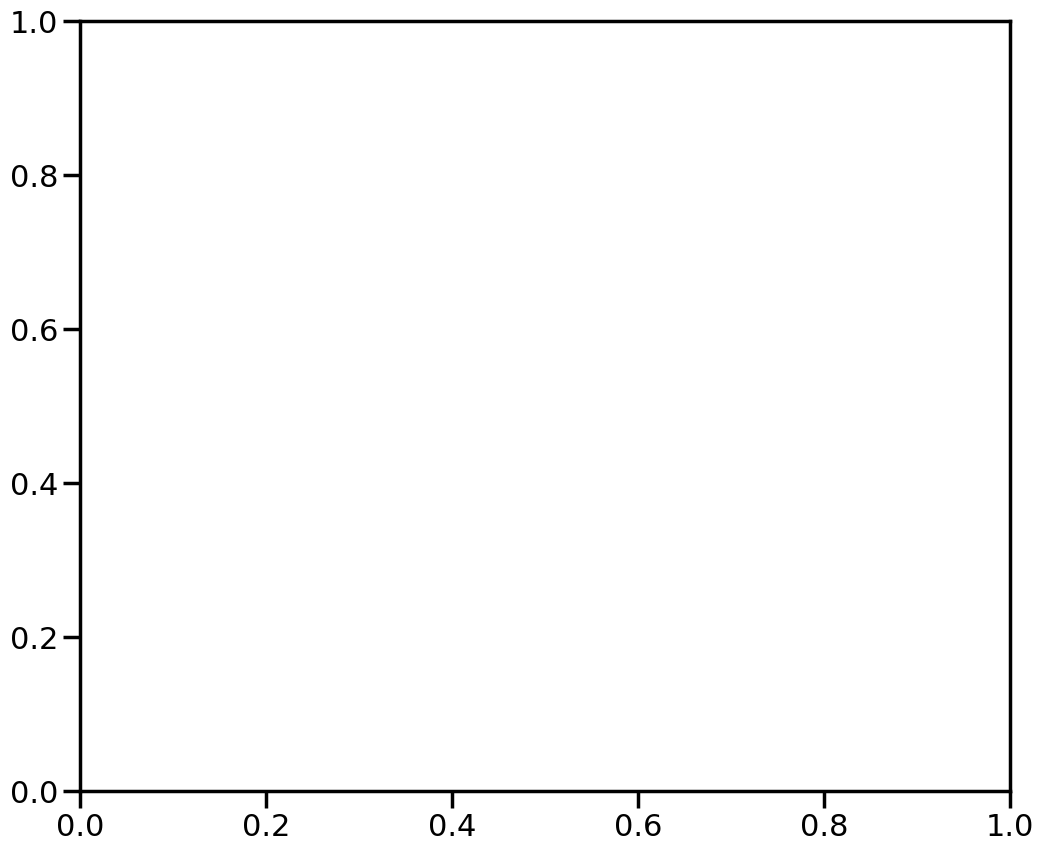

<Figure size 640x480 with 0 Axes>

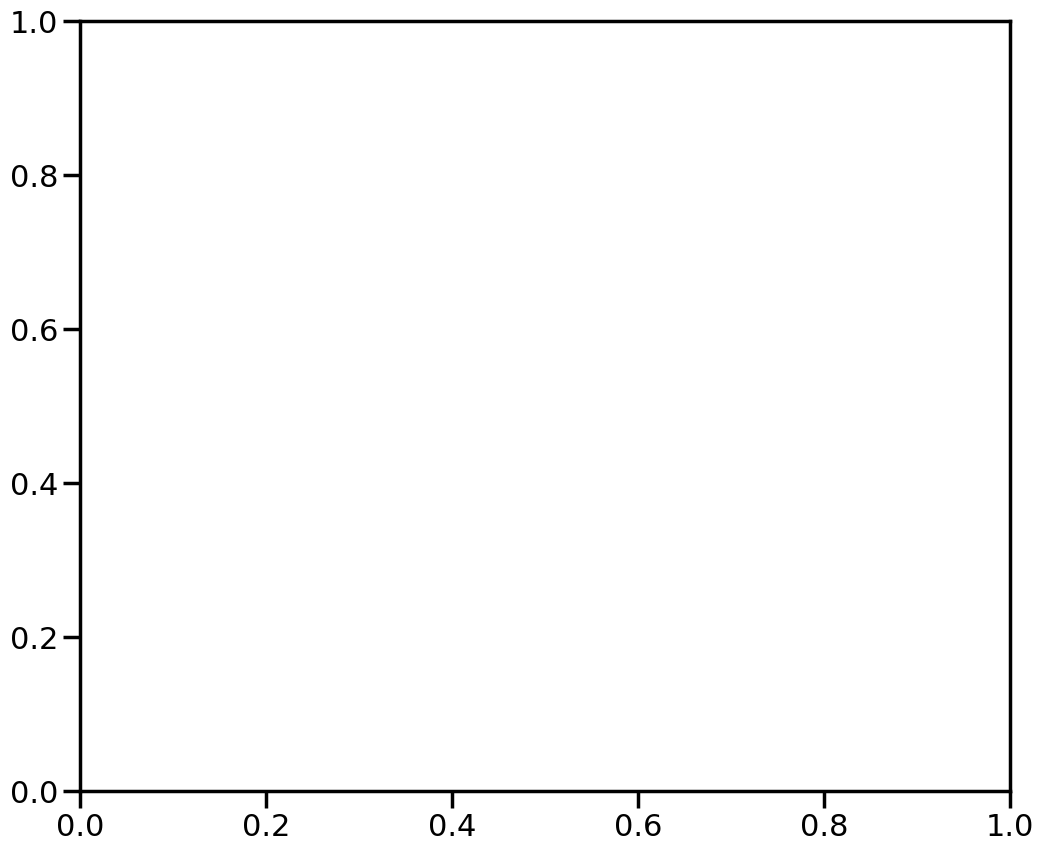

<Figure size 640x480 with 0 Axes>

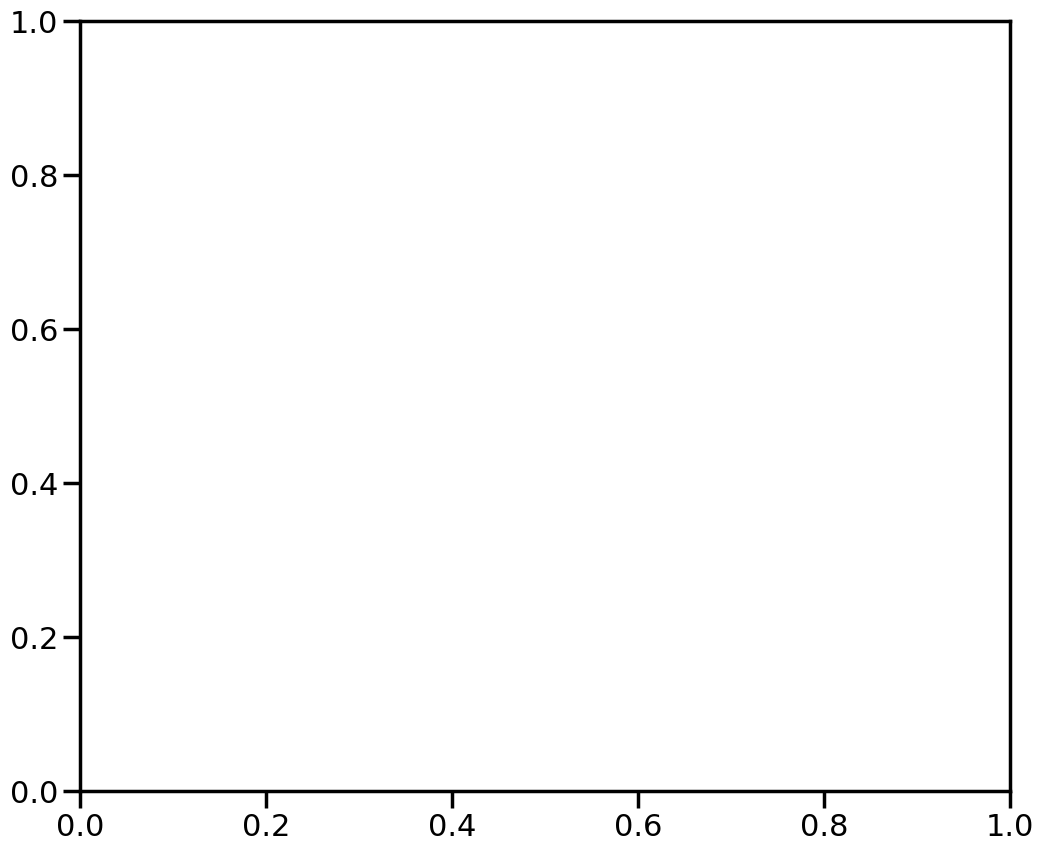

In [24]:
out1 = widgets.Output() #<- this is part of the code that helps display your graphs in tabs
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3, out4]) #<- more code to support tab display
tab.set_title(0, 'Probability')
tab.set_title(1, 'Distance')
tab.set_title(2, 'Duration')
tab.set_title(3, 'Speed')
display(tab)

plt.rcParams.update({'lines.markeredgewidth': 1})
sns.set_context("poster")
# Probability
with out1:
    plt.figure(linewidth = 2.5) #<- Make your figure lines THICCCC for clean display (posters)
    plt.figure(figsize=(12,10)) #<- set your figure size (width, length)
    plt.gca().xaxis.grid(False) #<- gets rid of x-axis markers to make data look clean 
    ax = sns.lineplot(x="Time", #<- Here we use seaborn as our graphing package. 
                 y="prob",  
                 data = TotalConcatenated,
                 hue = 'Gene', #<- Here we use the extra column from step 6 to separate by group
                 palette = 'deep',
                 linewidth=3,
                 style='Gene',
                 dashes=False,
                 markers=['o','o'],
                 markersize=12,
                 err_style='bars',
                 errorbar = 'se') #<- Confidence interval. 95 = standard error
    plt.xlabel("Time (s)") #<- X-axis title
    plt.ylabel("Probability") #<- Y-Axis title
    plt.title("Probability of Tap Habituation") #<- Figure Title
    plt.ylim(0,1)
    plt.xlim(550,None)
    plt.xticks(rotation=90)
    ax.legend(loc = 'upper right', fontsize = '20') #<- location of your legend
    plt.savefig('/Users/Joseph/Desktop/NewData/unc43prob.png', format='png', dpi=900,bbox_inches='tight') #<- saves your file to your folder at certain DPI
    plt.show()
    
# Distance
with out2:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="Time", 
                 y="dist", 
                 data = TotalConcatenated,
                 hue = 'dataset',
                 palette = 'deep',
#                  palette = pal,
                 errorbar = 'se'
                      )
    plt.xlabel("Time (s)", fontsize = '12')
    plt.ylabel("Distance", fontsize = '12')
    plt.title("Distance of Tap Habituation", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Distance_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Duration
with out3:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="Time", 
                 y="dura", 
                 data = TotalConcatenated,
                 hue = 'dataset',
                 palette = 'deep',
#                  palette = pal,
                 errorbar = 'se'
                      )
    plt.xlabel("Time (s)", fontsize = '12')
    plt.ylabel("Duration", fontsize = '12')
    plt.title("Duration of Tap Habituation", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Duration_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Speed
with out4:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="Time", 
                 y="speed", 
                 data = data,
                 hue = 'dataset',
                 palette = 'deep',
#                  palette = pal,
                 errorbar = 'se'
                      )
    plt.xlabel("Time (s)", fontsize = '12')
    plt.ylabel("Speed", fontsize = '12')
    plt.title("Speed of Tap Habituation", fontsize = '16')
    plt.ylim(0,None)
    plt.xticks(rotation=90)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Speed_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

<Figure size 640x480 with 0 Axes>

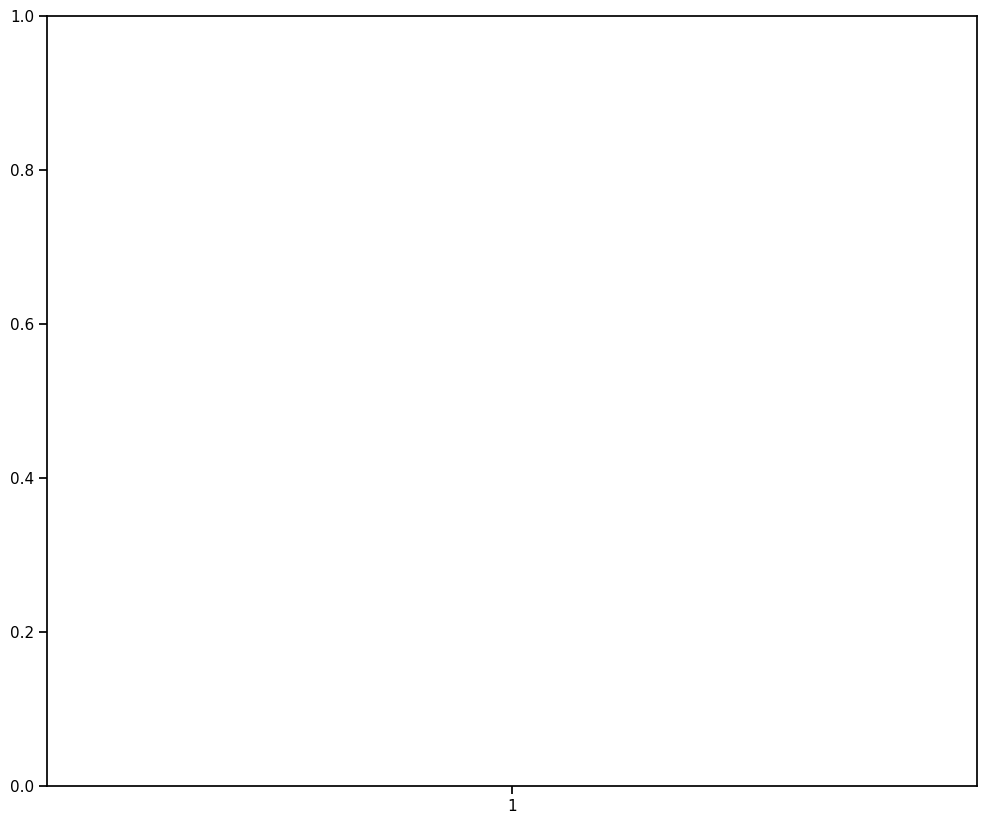

In [31]:
out1 = widgets.Output() #<- this is part of the code that helps display your graphs in tabs
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3, out4]) #<- more code to support tab display
tab.set_title(0, 'Probability')
tab.set_title(1, 'Distance')
tab.set_title(2, 'Duration')
tab.set_title(3, 'Speed')
display(tab)

plt.rcParams.update({'lines.markeredgewidth': 1})
sns.set_context("notebook")
# Probability
with out1:
    plt.figure(linewidth = 2.5) #<- Make your figure lines THICCCC for clean display (posters)
    plt.figure(figsize=(12,10)) #<- set your figure size (width, length)
    plt.gca().xaxis.grid(False) #<- gets rid of x-axis markers to make data look clean 
    ax = sns.pointplot(x="taps", #<- Here we use seaborn as our graphing package. 
                 y="prob",  
                 data = TotalConcatenated,
                 hue = 'dataset', #<- Here we use the extra column from step 6 to separate by group    
                 palette = pal, #<- Change colour palette here if you like
                 errorbar = 'se') #<- Confidence interval. 95 = standard error
    plt.xlabel("Taps") #<- X-axis title
    plt.ylabel("Probability") #<- Y-Axis title
    plt.title(f"Probability of Tap Habituation, {ISI}ISI") #<- Figure Title
    plt.ylim(0,1)
    ax.legend(loc = 'upper right', fontsize = '12') #<- location of your legend
#     plt.savefig(f'Probability_{ISI}ISI.png', format='png', dpi=900) #<- saves your file to your folder at certain DPI
    plt.show()

# Distance
with out2:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="dist", 
                 data = TotalConcatenated,
                 hue = 'dataset',
                 palette = pal,
                 errorbar = 'se'  #ci=68 for sem
                      )
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Distance", fontsize = '12')
    plt.title(f"Distance of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Distance_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Duration
with out3:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="dura", 
                 data = TotalConcatenated,
                 hue = 'dataset',
                 palette = pal,
                 errorbar = 'se'  #ci=68 for sem
                      )
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Duration", fontsize = '12')
    plt.title(f"Duration of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Duration_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Speed
with out4:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="speed", 
                 data = TotalConcatenated,
                 hue = 'dataset',
                 palette = pal,
                 errorbar = 'se' #ci=68 for sem
                      )
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Speed", fontsize = '12')
    plt.title(f"Speed of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Speed_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Done!

In [ ]:
out1 = widgets.Output() #<- this is part of the code that helps display your graphs in tabs
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3, out4]) #<- more code to support tab display
tab.set_title(0, 'Probability')
tab.set_title(1, 'Distance')
tab.set_title(2, 'Duration')
tab.set_title(3, 'Speed')
display(tab)

plt.rcParams.update({'lines.markeredgewidth': 1})
sns.set_context("notebook")
# Probability
with out1:
    plt.figure(linewidth = 2.5) #<- Make your figure lines THICCCC for clean display (posters)
    plt.figure(figsize=(12,10)) #<- set your figure size (width, length)
    plt.gca().xaxis.grid(False) #<- gets rid of x-axis markers to make data look clean 
    ax = sns.violinplot(x="taps", #<- Here we use seaborn as our graphing package. 
                        y="prob",  
                        data = TotalConcatenated,
                        hue = 'date', #<- Here we use the extra column from step 6 to separate by group    
                        palette = pal, #<- Change colour palette here if you like
                        errorbar = 'se') #<- Confidence interval. 95 = standard error
    plt.xlabel("Taps") #<- X-axis title
    plt.ylabel("Probability") #<- Y-Axis title
    plt.title(f"Probability of Tap Habituation, {ISI}ISI") #<- Figure Title
    plt.ylim(0,1)
    ax.legend(loc = 'upper right', fontsize = '12') #<- location of your legend
#     plt.savefig(f'Probability_{ISI}ISI.png', format='png', dpi=900) #<- saves your file to your folder at certain DPI
    plt.show()

# Distance
with out2:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="dist", 
                 data = TotalConcatenated,
                 hue = 'date',
                 palette = pal,
                 errorbar = 'se'  #ci=68 for sem
                      )
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Distance", fontsize = '12')
    plt.title(f"Distance of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Distance_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Duration
with out3:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="dura", 
                 data = TotalConcatenated,
                 hue = 'date',
                 palette = pal,
                 errorbar = 'se'  #ci=68 for sem
                      )
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Duration", fontsize = '12')
    plt.title(f"Duration of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Duration_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Speed
with out4:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(12,10))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="speed", 
                 data = TotalConcatenated,
                 hue = 'date',
                 palette = pal,
                 errorbar = 'se' #ci=68 for sem
                      )
    plt.xlabel("Taps", fontsize = '12')
    plt.ylabel("Speed", fontsize = '12')
    plt.title(f"Speed of Tap Habituation, {ISI}ISI", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(loc = 'upper right', fontsize = '12')
#     plt.savefig(f'Speed_{ISI}ISI.png', format='png', dpi=900)
    plt.show()

# Strip Plot For Batch Effects

In [40]:
TotalByDate=TotalConcatenated.drop(['plate_id','dataset'], axis=1).groupby(['taps','date'], as_index=False).mean()
print(TotalByDate)

     taps      date        time    dura     dist      prob     speed  plate
0       1  20220510   599.97460  2.2560  0.56620  0.609048  0.480907    3.0
1       1  20220511   599.96460  2.5560  0.52840  0.916057  0.208252    8.0
2       1  20220513   599.96940  2.3900  0.55220  0.787177  0.233872   13.0
3       1  20220524   599.96770  2.5440  0.66240  0.862771  0.263577   20.5
4       1  20220627   599.95340  2.7800  0.52740  0.848760  0.189861   28.0
...   ...       ...         ...     ...      ...       ...       ...    ...
1080   31  20230307  1189.96700  2.9820  0.68060  0.721271  0.224023  145.0
1081   31  20230324  1189.95200  2.6725  0.63475  0.728563  0.233296  164.5
1082   31  20230328  1189.93600  2.8020  0.57020  0.657163  0.201345  162.0
1083   31  20230331  1189.94675  1.8650  0.33200  0.619236  0.179072  157.5
1084   31  20230407  1189.98000  2.3575  0.52550  0.809232  0.221691  154.0

[1085 rows x 8 columns]


In [41]:
out1 = widgets.Output() #<- this is part of the code that helps display your graphs in tabs
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3, out4]) #<- more code to support tab display
tab.set_title(0, 'Probability')
tab.set_title(1, 'Distance')
tab.set_title(2, 'Duration')
tab.set_title(3, 'Speed')
display(tab)

plt.rcParams.update({'lines.markeredgewidth': 1})
sns.set_context("notebook")
# Probability
with out1:
    plt.figure(linewidth = 2.5) #<- Make your figure lines THICCCC for clean display (posters)
    plt.figure(figsize=(15,10)) #<- set your figure size (width, length)
    plt.gca().xaxis.grid(False) #<- gets rid of x-axis markers to make data look clean 
    ax = sns.violinplot(x="taps", #<- Here we use seaborn as our graphing package. 
                     y="prob",  
                     data = TotalByDate,
                    inner='point') 
    plt.xlabel("Taps", fontsize = '20') #<- X-axis title
    plt.ylabel("Probability", fontsize = '20') #<- Y-Axis title
    plt.title(f"N2 Probability of Tap Habituation, {ISI}ISI, PD Dataset", fontsize = '20') #<- Figure Title
    plt.ylim(0,1)
#     ax.legend(loc = 'upper right', fontsize = '12') #<- location of your legend
    plt.savefig('/Volumes/JOSEPH/PD_N2_Probability_variability_by_date.png', format='png', dpi=450, bbox_inches='tight') #<- saves your file to your folder at certain DPI
    plt.show()

# Distance
with out2:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(15,10))
    plt.gca().xaxis.grid(False)
    ax = sns.violinplot(x="taps", #<- Here we use seaborn as our graphing package. 
                     y="dist",  
                     data = TotalByDate,
                    inner='point') 
    plt.xlabel("Taps", fontsize = '20')
    plt.ylabel("Distance", fontsize = '20')
    plt.title(f"N2 Distance of Tap Habituation, {ISI}ISI, PD Dataset", fontsize = '20')
    plt.ylim(0,1.2)
#     ax.legend(loc = 'upper right', fontsize = '12')
    plt.savefig('/Volumes/JOSEPH/PD_N2_Distance_variability_by_date.png', format='png', dpi=450, bbox_inches='tight')
    plt.show()

# Duration
with out3:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(15,10))
    plt.gca().xaxis.grid(False)
    ax = sns.violinplot(x="taps", #<- Here we use seaborn as our graphing package. 
                     y="dura",  
                     data = TotalByDate,
                    inner='point') 
    plt.xlabel("Taps", fontsize = '20')
    plt.ylabel("Duration", fontsize = '20')
    plt.title(f"N2 Duration of Tap Habituation, {ISI}ISI, PD Dataset", fontsize = '20')
    plt.ylim(0,4)
#     ax.legend(loc = 'upper right', fontsize = '12')
    plt.savefig('/Volumes/JOSEPH/PD_N2_Duration_variability_by_date.png', format='png', dpi=450, bbox_inches='tight')
    plt.show()

# Speed
with out4:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(15,10))
    plt.gca().xaxis.grid(False)
    ax = sns.violinplot(x="taps", #<- Here we use seaborn as our graphing package. 
                     y="speed",  
                     data = TotalByDate,
                    inner='point') 
    plt.xlabel("Taps", fontsize = '20')
    plt.ylabel("Speed", fontsize = '20')
    plt.title(f"N2 Speed of Tap Habituation, {ISI}ISI, PD Dataset", fontsize = '20')
    plt.ylim(0,0.5)
#     ax.legend(loc = 'upper right', fontsize = '12')
    plt.savefig('/Volumes/JOSEPH/PD_N2_Speed_variability_by_date.png', format='png', dpi=450, bbox_inches='tight')
    plt.show()